# Final Demo - Trojan File Modeling and Analysis Project
    GitHub: https://github.com/cdman678/security_project
    
    Outline: 
        1) Our Feature Extractor - Analyze the makeup of a file without executing it on the system
            - We will show the Feature Extractor on a benign file, a Trojan file, and a non-Trojan malicious file
        
        2) Using our models (Random Forest Classifiers)
            - Show how we can load in our pre-made models to identify the type of file
            
        3) Show decision tree visual from our specialized Trojan Classifier 
            - How does our model identify a Trojan attack
        
        4) Feature Importance Breakdown 
            - What is important to identify a Trojan attack 
            - Explain the context of these features (why are they important)

# Using our Feature Extractor Function
    Demonstrate how we can parse a file for these key attributes 

    All Files Used (and their labels) come form the Dike Project: https://github.com/iosifache/DikeDataset

In [ ]:
benign_file_path = r"C:\Users\caleb\PycharmProjects\security_project\security_project\Data\benign.exe"
trojan_file_path = r"C:\Users\caleb\PycharmProjects\security_project\security_project\Data\trojan.exe"
malicious_file_path = r"C:\Users\caleb\PycharmProjects\security_project\security_project\Data\generic_malicious.exe"

In [2]:
all_files = [benign_file_path, trojan_file_path, malicious_file_path]

In [3]:
# Import our FeatureExtractor Library
from featureEx import FeatureExtractor
import pandas as pd
import re

    Run File Extractor on the 3 example files

In [4]:
master_df = pd.DataFrame()
for file in all_files:
    # instead of ..\Data\foo.exe we need foo
    print(file)
    hash_name = re.search(r'Data\\(.*)\.|Data\\(.*)',file).group(1)
    # Use FeatureExtractor
    newFeatureExtractor = FeatureExtractor(path=file)
    attributesToTest_df = newFeatureExtractor.getFileFeatures()
    attributesToTest_df["hash"] = hash_name
    # Save the file to the master DF
    master_df = master_df.append(attributesToTest_df, ignore_index=True)
    del attributesToTest_df
    del newFeatureExtractor

C:\Users\caleb\PycharmProjects\security_project\security_project\Data\benign.exe
C:\Users\caleb\PycharmProjects\security_project\security_project\Data\trojan.exe
C:\Users\caleb\PycharmProjects\security_project\security_project\Data\generic_malicious.exe


In [5]:
master_df.shape

(3, 58)

        Perform some minor cleanup before modeling

In [6]:
master_df = master_df.drop(columns=["ID","md5","VersionInformationSize","legitimate"])

In [7]:
master_df.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,hash
0,34404,240,558,2,25,19456,37376,3072,5376,4096,...,10,0,0,0,0,0,0,0,0,benign
1,332,224,271,6,0,36864,380928,0,5616,4096,...,0,5,3.04115,1.781496,6.504367,963.6,20,4264,0,trojan
2,332,224,258,9,0,60928,371712,0,427582,1536,...,0,1,3.427508,3.427508,3.427508,668.0,668,668,72,generic_malicious


# Using our Deployable Models
    We have trained RF Classifier Models in /Code/Modeling/Modeling.ipynb
    Now, we can pull in these models and run them against our test files

In [8]:
# Load in our pre-made model
# Note: Our Model is a RandomForestClassifier from the sklearn library
import pickle

with open('master_model', 'rb') as f:
    model = pickle.load(f)

In [9]:
# Use the model
# Here we predict - Benign, Trojan, or Generic (non-Trojan Attack)
predictions = model.predict(master_df.drop(columns=["hash"]))

C:\Users\caleb\PycharmProjects\security_project\ven\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [10]:
predictions

array(['benign', 'trojan', 'generic'], dtype=object)

In [11]:
master_df["prediction"] = predictions

In [12]:
master_df.head()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,hash,prediction
0,34404,240,558,2,25,19456,37376,3072,5376,4096,...,0,0,0,0,0,0,0,0,benign,benign
1,332,224,271,6,0,36864,380928,0,5616,4096,...,5,3.04115,1.781496,6.504367,963.6,20,4264,0,trojan,trojan
2,332,224,258,9,0,60928,371712,0,427582,1536,...,1,3.427508,3.427508,3.427508,668.0,668,668,72,generic_malicious,generic


# Explain how we Identify Trojan Attacks 
    We can predict a Trojan attack, but what gives it away?
    This is one of the key takeaways from this project

## Show Decision Tree
    This is one tree in the forest, to give you the idea about the complexity of the model

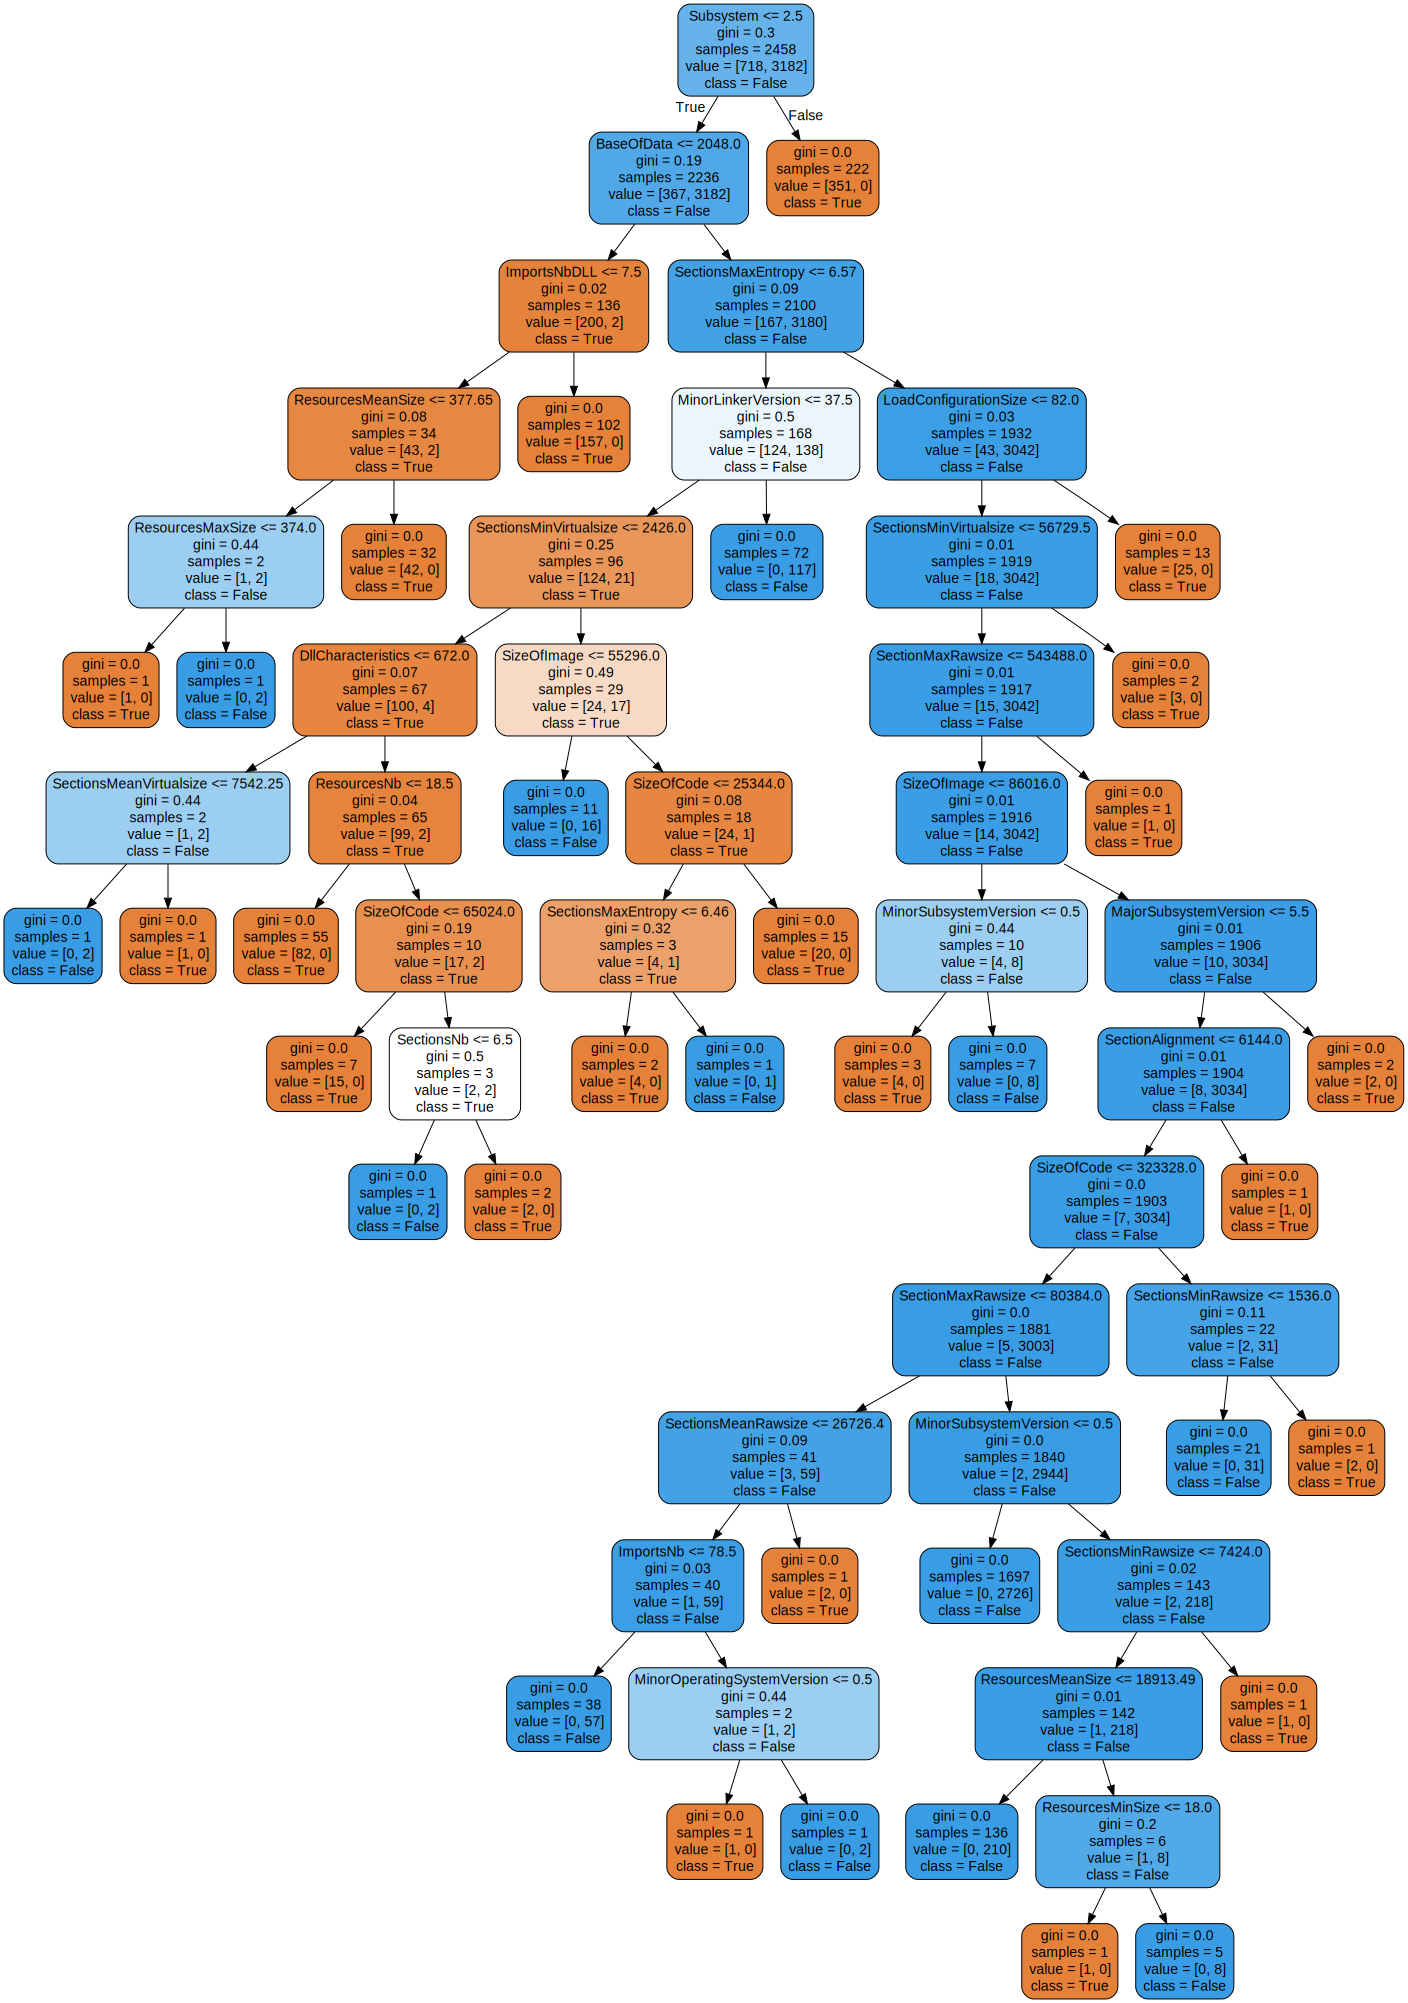

In [13]:
from IPython.display import SVG
SVG(filename="single_trojan_tree.svg")

## Show Feature Importance 
    We can open up the "forest" and see which features carry the most weight
    We calculate this in Code/Modeling/Modeling.ipynb

In [14]:
# Here we are loading in the feature importance of our Trojan focused classifier
# We opened up the model to see which attributes carry the heaviest weight
trojan_feature_importances_df = pd.read_pickle("trojan_feature_importance.p")

In [15]:
trojan_feature_importances_df.head(10)

,feature,trojan_feature_importance
0,SectionsMaxEntropy,0.12
1,SizeOfImage,0.09
2,BaseOfData,0.07
3,DllCharacteristics,0.07
4,SizeOfOptionalHeader,0.06
5,Subsystem,0.06
6,MajorSubsystemVersion,0.05
7,SectionMaxRawsize,0.05
8,SectionMaxVirtualsize,0.05
9,Machine,0.03


## Put Context to the Key Features - Example
    Our Model can accurately label most files with ~99.5% Accuracy
    Then, we can analyze this Model to see what is important when labeling a file as Trojan
    Now, we can start to make sense of these attributes and explain why they are important
    
    Our paper will go deeper on this topic but for the Demo, here is a short explanation on the top 3 features

### Definitions:

- <b>Trojan Attacks</b>: Trojan attacks are a type of malware that disguises itself as legitimate code. Once the code is inside a network, it can carry out actions that a legitimate user could perform (i.e., exporting files, modifying data, deleting files, etc.). Trojans are often hidden in downloads (games, apps, etc). 


- <b>Entropy</b>: Randomness in the file data/content. Frequently, attacks will hide their malware code via encryption. The encrypted code shows up as a series of random characters, thus increasing a file's entropy


- <b>Size of Image</b>: This is the size of the file. It is expected that a Trojan file will be much large as the file has not only a Trojan shell but also carries malicious code hidden within. Compared to a benign file that carries only valid code.


- <b>Base of Data</b>: This is an optional header (0 if not present). This header value helps explains the structure of the file. 32-bit files have 31 optional headers, while 64-bit files have 30 optional headers. The extra header present in the 32-bit optional header member list is this "BaseOfData" header. Now it's important to note that most malware is still 32-bit as the WOW64 back-compatibility architecture allows these 32-bit malware files to execute on both 32 and 64-bit operating systems. However, most newer computers are 64-bit, and users downloading benign files will likely opt for the 64-bit version of code. This would make sense why our model weights the knowledge of knowing if a file is 32-bit or 64-bit so high

     Look at the Data

In [16]:
master_df[["hash","SectionsMaxEntropy","SizeOfImage","BaseOfData"]].head(2)

,hash,SectionsMaxEntropy,SizeOfImage,BaseOfData
0,benign,5.959609,69632,0
1,trojan,7.904828,823296,40960
